In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

data = pd.read_csv("/content/water_potability.csv")
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [37]:
from csv import writer
with open("/content/water_potability.csv","a") as f:
  cw=writer(f)
  while True:
    data=input("Enter data (in form of list): ")
    cw.writerow(data)
    ch=input("Enter more data? (Y/N) :  ")
    if ch=="Y":
      pass
    else:
      break

Enter data (in form of list): 3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
Enter more data? (Y/N) :  N


In [17]:
data = data.dropna()
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

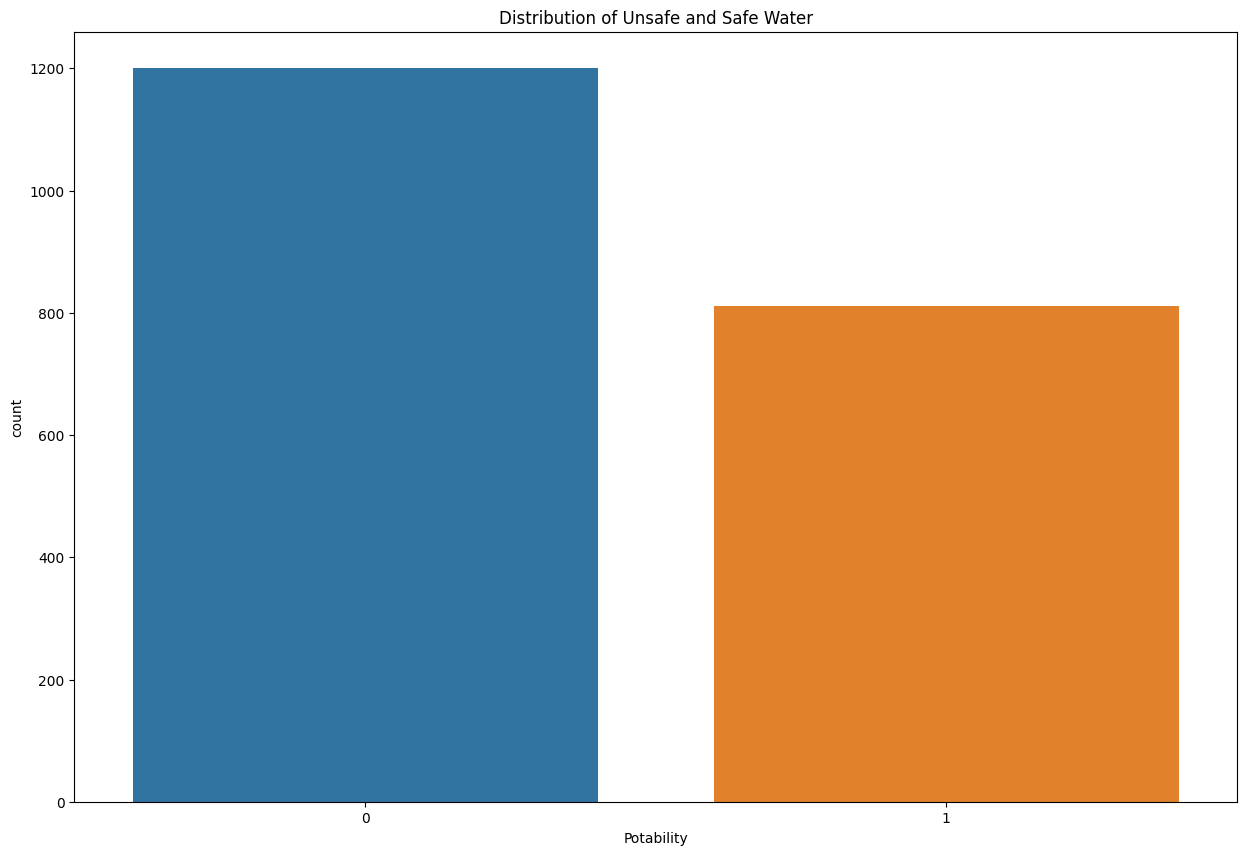

In [19]:
plt.figure(figsize=(15, 10))
sns.countplot(data = data, x="Potability")
plt.title("Distribution of Unsafe and Safe Water")
plt.show()

In [20]:
import plotly.express as px
data = data
figure = px.histogram(data, x = "ph",
                      color = "Potability",
                      title= "Factors Affecting Water Quality: PH")
figure.show()

In [21]:
figure = px.histogram(data, x = "Hardness",
                      color = "Potability",
                      title= "Factors Affecting Water Quality: Hardness")
figure.show()

In [22]:
figure = px.histogram(data, x = "Solids",
                      color = "Potability",
                      title= "Factors Affecting Water Quality: Solids")
figure.show()

In [23]:

figure = px.histogram(data, x = "Chloramines",
                      color = "Potability",
                      title= "Factors Affecting Water Quality: Chloramines")
figure.show()

In [24]:
figure = px.histogram(data, x = "Sulfate",
                      color = "Potability",
                      title= "Factors Affecting Water Quality: Sulfate")
figure.show()

In [25]:
figure = px.histogram(data, x = "Conductivity",
                      color = "Potability",
                      title= "Factors Affecting Water Quality: Conductivity")
figure.show()

In [26]:
figure = px.histogram(data, x = "Organic_carbon",
                      color = "Potability",
                      title= "Factors Affecting Water Quality: Organic Carbon")
figure.show()

In [27]:
figure = px.histogram(data, x = "Trihalomethanes",
                      color = "Potability",
                      title= "Factors Affecting Water Quality: Trihalomethanes")
figure.show()

In [28]:
figure = px.histogram(data, x = "Turbidity",
                      color = "Potability",
                      title= "Factors Affecting Water Quality: Turbidity")
figure.show()

In [31]:
correlation = data.corr()
correlation["ph"].sort_values(ascending=False)

ph                 1.000000
Hardness           0.108948
Organic_carbon     0.028375
Trihalomethanes    0.018278
Potability         0.014530
Conductivity       0.014128
Sulfate            0.010524
Chloramines       -0.024768
Turbidity         -0.035849
Solids            -0.087615
Name: ph, dtype: float64

In [35]:
from pycaret.classification import *
clf = setup(data=data, target="Potability",session_id=786)
compare_models()


,Description,Value
0,Session id,786
1,Target,Potability
2,Target type,Binary
3,Original data shape,"(2011, 10)"
4,Transformed data shape,"(2011, 10)"
5,Transformed train set shape,"(1407, 10)"
6,Transformed test set shape,"(604, 10)"
7,Numeric features,9
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.6802,0.6956,0.3952,0.6778,0.4977,0.2870,0.3100,0.5460
rf,Random Forest Classifier,0.6780,0.6844,0.4040,0.6696,0.5024,0.2854,0.3063,1.4660
qda,Quadratic Discriminant Analysis,0.6745,0.7091,0.3866,0.6795,0.4879,0.2746,0.3013,0.1090
gbc,Gradient Boosting Classifier,0.6489,0.6554,0.3581,0.6232,0.4505,0.2186,0.2397,0.6800
lightgbm,Light Gradient Boosting Machine,0.6432,0.6658,0.4869,0.5719,0.5232,0.2416,0.2453,0.4710
xgboost,Extreme Gradient Boosting,0.6389,0.6581,0.4744,0.5629,0.5129,0.2301,0.2331,0.3530
nb,Naive Bayes,0.6212,0.6280,0.2506,0.5728,0.3474,0.1344,0.1581,0.1380
ridge,Ridge Classifier,0.5984,0.0000,0.0282,0.6267,0.0534,0.0137,0.0499,0.2490
lda,Linear Discriminant Analysis,0.5970,0.5189,0.0299,0.5867,0.0564,0.0115,0.0421,0.1160
dummy,Dummy Classifier,0.5970,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0990


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=786, verbose=0, warm_start=False)

In [36]:
from pycaret.classification import *
clf = setup(data=data, target="Potability",session_id=786)
model=create_model("rf")
predict=predict_model(model, data=data)
predict.head()

,Description,Value
0,Session id,786
1,Target,Potability
2,Target type,Binary
3,Original data shape,"(2011, 10)"
4,Transformed data shape,"(2011, 10)"
5,Transformed train set shape,"(1407, 10)"
6,Transformed test set shape,"(604, 10)"
7,Numeric features,9
8,Preprocess,True
9,Imputation type,simple


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6596,0.6720,0.3684,0.6364,0.4667,0.2419,0.2614
1,0.6809,0.7256,0.3684,0.7000,0.4828,0.2828,0.3133
2,0.7163,0.6705,0.4211,0.7742,0.5455,0.3644,0.4002
3,0.7021,0.6919,0.4386,0.7143,0.5435,0.3407,0.3630
4,0.6383,0.6312,0.4035,0.5750,0.4742,0.2113,0.2190
5,0.6454,0.6917,0.3509,0.6061,0.4444,0.2103,0.2273
6,0.7092,0.7448,0.4035,0.7667,0.5287,0.3466,0.3839
7,0.6500,0.6197,0.3750,0.6000,0.4615,0.2222,0.2357
8,0.7000,0.7027,0.5000,0.6667,0.5714,0.3478,0.3563


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8951,0.9681,0.8089,0.9213,0.8615,0.7776,0.7819


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,prediction_label,prediction_score
3,8.316766,214.373398,22018.417969,8.059333,356.886139,363.266510,18.436525,100.341675,4.628770,0,0,0.84
4,9.092223,181.101517,17978.986328,6.546600,310.135742,398.410828,11.558279,31.997993,4.075076,0,0,0.94
5,5.584086,188.313324,28748.687500,7.544869,326.678375,280.467926,8.399734,54.917862,2.559708,0,0,0.85
6,10.223862,248.071732,28749.716797,7.513409,393.663391,283.651642,13.789696,84.603554,2.672989,0,0,0.67
7,8.635849,203.361526,13672.091797,4.563009,303.309784,474.607635,12.363816,62.798309,4.401425,0,0,0.95
